In [1]:
import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 

### 1. Dataset 

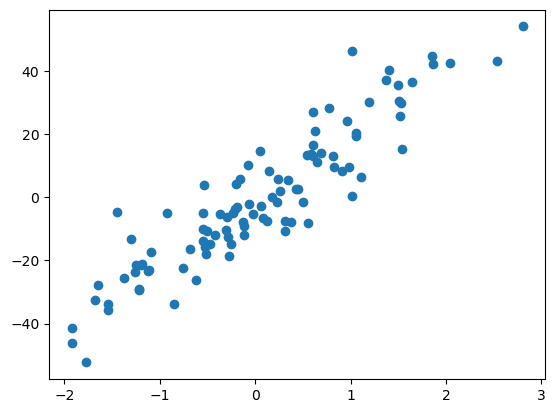

In [3]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [6]:
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [9]:
# Matrice X
X = np.hstack((x, np.ones(x.shape)))
X

(100, 2)

In [10]:
theta = np.random.randn(2,1)
theta

array([[ 0.06506087],
       [-0.1995992 ]])

### 2. Modèle 

In [23]:
def model(X, theta):
    return X.dot(theta)

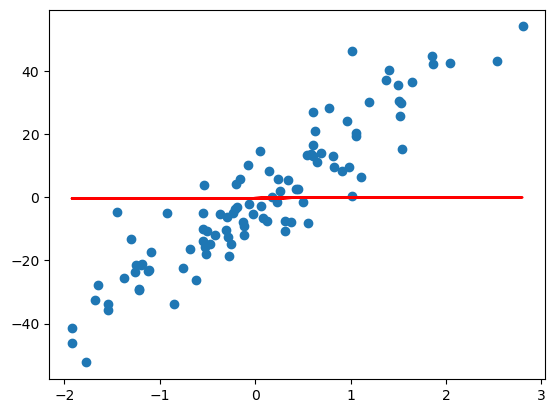

In [28]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')

### Fonction cout

In [30]:
def cost_function(X, y , theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X, theta)-y)**2)

In [31]:
cost_function(X, y , theta)

247.00419945269095

### Descente de Gradient

In [32]:
def grad(X, y , theta):
    m = len(y)
    return 1/m*X.T.dot(model(X, theta)-y)

In [35]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    for i in range(0, n_iteration):
        theta = theta-learning_rate*grad(X,y,theta)
    return theta

### Entraînement du modèle 

In [37]:
theta_final = gradient_descent(X, y, theta, learning_rate=0.001, n_iteration=1000)

NameError: name 'thetaS' is not defined